In [4]:
import pandas as pd

# 1. Load data
df = pd.read_csv("../Data/Merged/merged_players_clean0.csv")

# 2. Target and features
y = df["market_value_eur"]
X = df.drop(columns=["market_value_eur", "market_value", "club"])
print(f"Training samples: {X.shape=}")


Training samples: X.shape=(3977, 181)



Learning curve: XGBRegressor
  k=   200 | R²=0.6872 | MAE=2600080.66
  k=   471 | R²=0.7558 | MAE=2204911.55
  k=   742 | R²=0.8077 | MAE=1992009.28
  k=  1013 | R²=0.8322 | MAE=1832435.10
  k=  1284 | R²=0.8252 | MAE=1850618.87
  k=  1555 | R²=0.8158 | MAE=1823153.35
  k=  1826 | R²=0.8226 | MAE=1844917.35
  k=  2097 | R²=0.8311 | MAE=1757487.70
  k=  2368 | R²=0.8319 | MAE=1764785.01
  k=  2639 | R²=0.8384 | MAE=1753630.06
  k=  2910 | R²=0.8284 | MAE=1725361.61
  k=  3181 | R²=0.8216 | MAE=1715496.13

Learning curve: RandomForest
  k=   200 | R²=0.6365 | MAE=2869634.81
  k=   471 | R²=0.7299 | MAE=2406257.93
  k=   742 | R²=0.7614 | MAE=2161015.70
  k=  1013 | R²=0.8183 | MAE=1993072.08
  k=  1284 | R²=0.7992 | MAE=2038492.15
  k=  1555 | R²=0.8168 | MAE=1909480.92
  k=  1826 | R²=0.8256 | MAE=1880335.19
  k=  2097 | R²=0.8298 | MAE=1853646.20
  k=  2368 | R²=0.8328 | MAE=1840462.78
  k=  2639 | R²=0.8330 | MAE=1829221.18
  k=  2910 | R²=0.7954 | MAE=1856545.62
  k=  3181 | R²=0.81

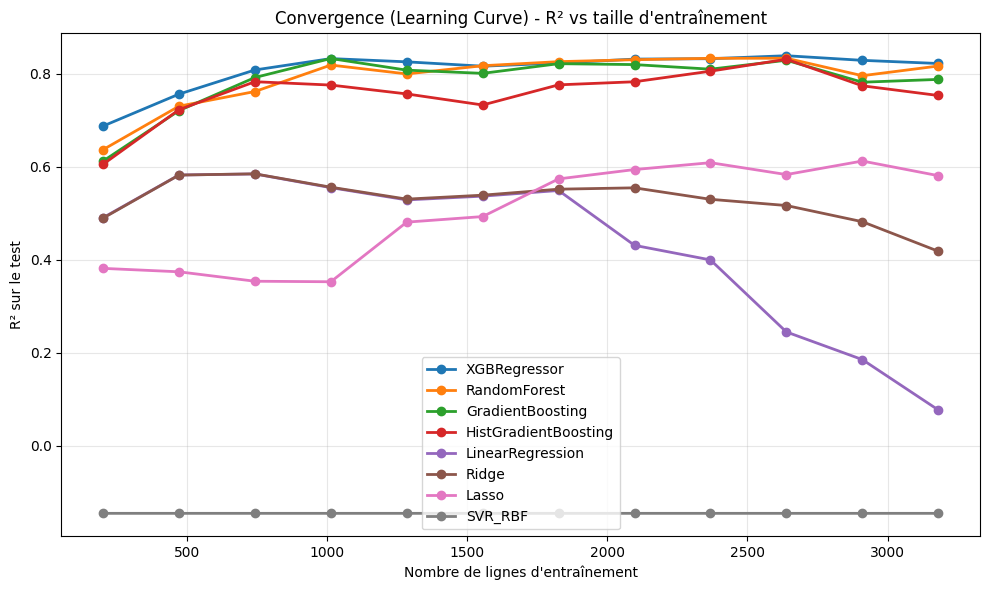

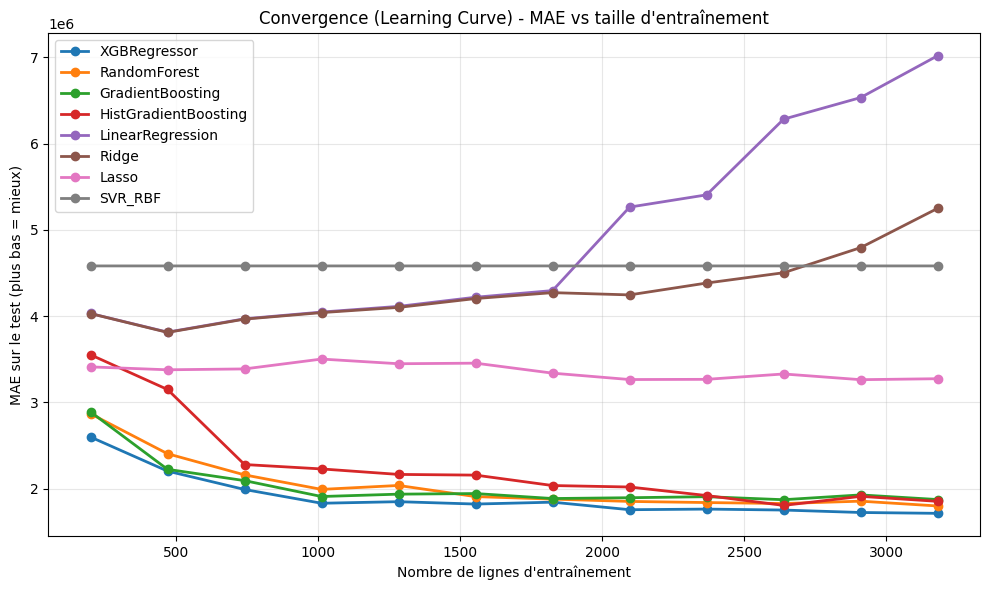


Learning curve: XGBRegressor
  k=   200 | R²=0.6872 | MAE=2600080.66
  k=   471 | R²=0.7558 | MAE=2204911.55
  k=   742 | R²=0.8077 | MAE=1992009.28
  k=  1013 | R²=0.8322 | MAE=1832435.10
  k=  1284 | R²=0.8252 | MAE=1850618.87
  k=  1555 | R²=0.8158 | MAE=1823153.35
  k=  1826 | R²=0.8226 | MAE=1844917.35
  k=  2097 | R²=0.8311 | MAE=1757487.70
  k=  2368 | R²=0.8319 | MAE=1764785.01
  k=  2639 | R²=0.8384 | MAE=1753630.06
  k=  2910 | R²=0.8284 | MAE=1725361.61
  k=  3181 | R²=0.8216 | MAE=1715496.13

Learning curve: RandomForest
  k=   200 | R²=0.6365 | MAE=2869634.81
  k=   471 | R²=0.7299 | MAE=2406257.93
  k=   742 | R²=0.7614 | MAE=2161015.70
  k=  1013 | R²=0.8183 | MAE=1993072.08
  k=  1284 | R²=0.7992 | MAE=2038492.15
  k=  1555 | R²=0.8168 | MAE=1909480.92
  k=  1826 | R²=0.8256 | MAE=1880335.19
  k=  2097 | R²=0.8298 | MAE=1853646.20
  k=  2368 | R²=0.8328 | MAE=1840462.78
  k=  2639 | R²=0.8330 | MAE=1829221.18
  k=  2910 | R²=0.7954 | MAE=1856545.62
  k=  3181 | R²=0.81

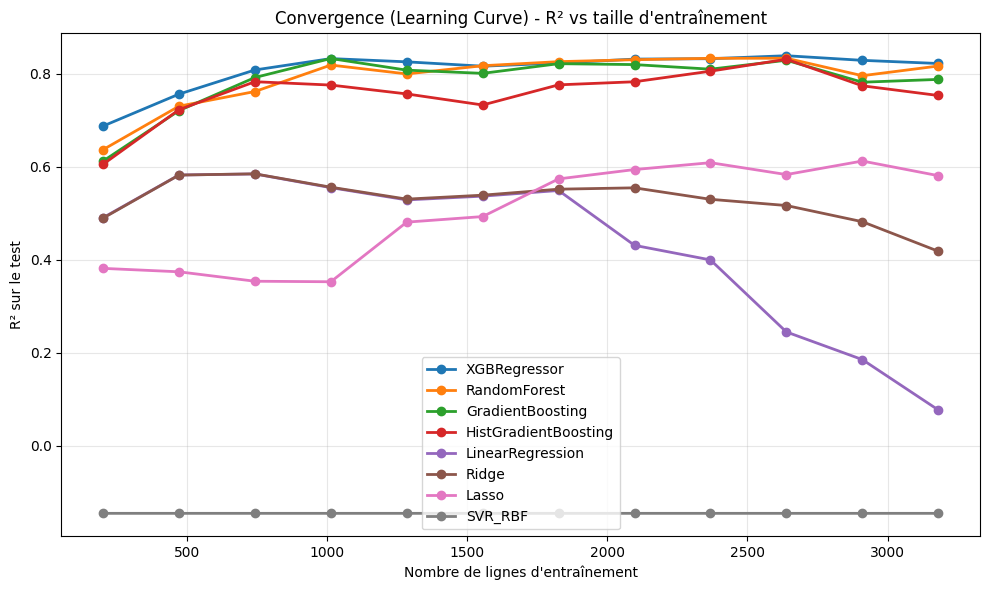

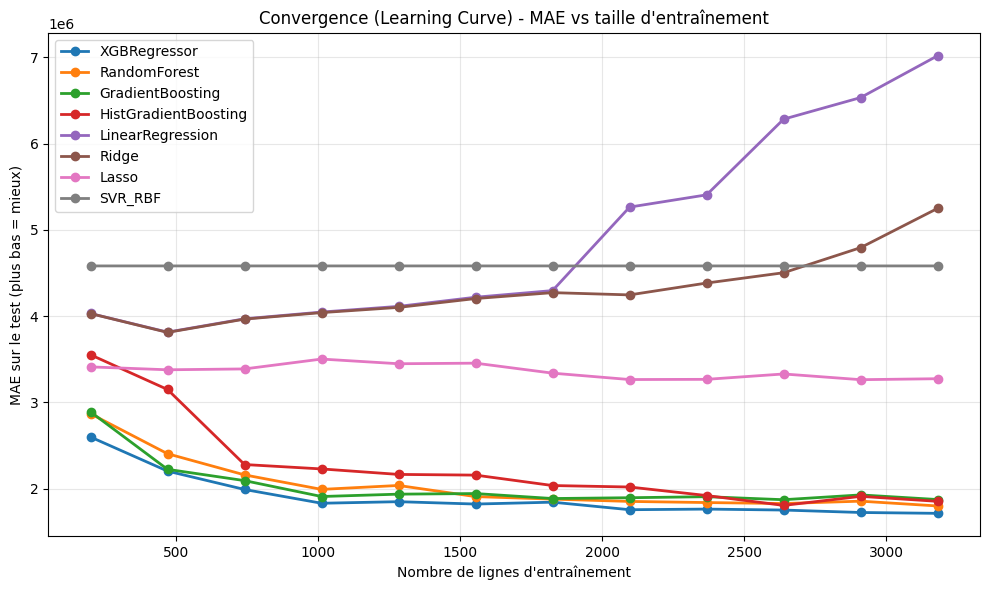

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from xgboost import XGBRegressor

# 1. Load data
df = pd.read_csv("../Data/Merged/merged_players_clean0.csv")

# 2. Target and features
y = df["market_value_eur"]
X = df.drop(columns=["market_value_eur", "market_value", "club"])

# One-hot encode categoricals
X = pd.get_dummies(X, drop_first=True)

# 3. Train / test split (same for all models)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Define models to compare
models = {
    "XGBRegressor": XGBRegressor(
        n_estimators=600,
        learning_rate=0.03,
        max_depth=7,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=2,
        random_state=42
    ),
    "RandomForest": RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        n_jobs=-1,
        random_state=42
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=600,
        learning_rate=0.03,
        max_depth=3,
        random_state=42
    ),
    "HistGradientBoosting": HistGradientBoostingRegressor(
        max_depth=7,
        learning_rate=0.05,
        max_iter=400,
        random_state=42
    ),
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=10.0),
    "Lasso": Lasso(alpha=1e5, max_iter=10000),
    # SVR can be slow on large data; comment out if too heavy
    "SVR_RBF": SVR(kernel="rbf", C=10.0, epsilon=0.1)
}

# 5. Fit, predict, evaluate
# results = []

# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     results.append((name, mae, r2))

#     print(f"{name} -> MAE: {mae:.2f} | R²: {r2:.4f}")

# # 6. Sort and print summary
# print("\n=== Model Comparison (sorted by MAE) ===")
# for name, mae, r2 in sorted(results, key=lambda x: x[1]):
#     print(f"{name:20s}  MAE: {mae:10.2f} | R²: {r2:8.4f}")
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn.metrics import r2_score, mean_absolute_error

# -------------------------------------------------------------------
# 0) (Optionnel mais recommandé) Pipelines pour modèles sensibles à l’échelle
#    (SVR / régressions linéaires). Pour RF/GB/XGB pas nécessaire.
# -------------------------------------------------------------------
models = {
    "XGBRegressor": models["XGBRegressor"],
    "RandomForest": models["RandomForest"],
    "GradientBoosting": models["GradientBoosting"],
    "HistGradientBoosting": models["HistGradientBoosting"],
    "LinearRegression": make_pipeline(StandardScaler(), LinearRegression()),
    "Ridge": make_pipeline(StandardScaler(), Ridge(alpha=10.0)),
    "Lasso": make_pipeline(StandardScaler(), Lasso(alpha=1e5, max_iter=10000)),
    "SVR_RBF": make_pipeline(StandardScaler(), SVR(kernel="rbf", C=10.0, epsilon=0.1)),
}

# Si X_train/X_test sont des DataFrames pandas
X_train_np = X_train.values
X_test_np  = X_test.values
y_train_np = y_train.values
y_test_np  = y_test.values

# -------------------------------------------------------------------
# 1) Définir les tailles d’entraînement (en nombre de lignes)
# -------------------------------------------------------------------
n_train = X_train_np.shape[0]
train_sizes = np.unique(np.linspace(200, n_train, 12, dtype=int))  # ajuste 200 et 12 si besoin
train_sizes = train_sizes[train_sizes <= n_train]

# Pour reproductibilité : on mélange une fois puis on prend les k premières lignes
rng = np.random.RandomState(42)
perm = rng.permutation(n_train)

# -------------------------------------------------------------------
# 2) Calcul learning curves (R² + MAE) pour chaque modèle
# -------------------------------------------------------------------
curves = {}  # name -> dict(train_sizes, r2_list, mae_list)

for name, model in models.items():
    r2_list, mae_list = [], []
    print(f"\nLearning curve: {name}")

    for k in train_sizes:
        idx = perm[:k]
        Xk, yk = X_train_np[idx], y_train_np[idx]

        m = clone(model)
        m.fit(Xk, yk)
        pred = m.predict(X_test_np)

        r2_list.append(r2_score(y_test_np, pred))
        mae_list.append(mean_absolute_error(y_test_np, pred))

        print(f"  k={k:6d} | R²={r2_list[-1]:.4f} | MAE={mae_list[-1]:.2f}")

    curves[name] = {"train_sizes": train_sizes, "r2": r2_list, "mae": mae_list}

# -------------------------------------------------------------------
# 3) Plots
# -------------------------------------------------------------------
plt.figure(figsize=(10, 6))
for name, d in curves.items():
    plt.plot(d["train_sizes"], d["r2"], marker="o", linewidth=2, label=name)
plt.xlabel("Nombre de lignes d'entraînement")
plt.ylabel("R² sur le test")
plt.title("Convergence (Learning Curve) - R² vs taille d'entraînement")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for name, d in curves.items():
    plt.plot(d["train_sizes"], d["mae"], marker="o", linewidth=2, label=name)
plt.xlabel("Nombre de lignes d'entraînement")
plt.ylabel("MAE sur le test (plus bas = mieux)")
plt.title("Convergence (Learning Curve) - MAE vs taille d'entraînement")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [2]:

# 1. Load data
df = pd.read_csv("../Data/Merged/football_data_cleaned.csv")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# 1. Load Data (assuming you have your dataframe 'df')
# df = pd.read_csv('football_data_cleaned.csv') # Use your cleaned file

# 2. Select ONLY Numerical Columns
# This automatically drops 'dob', 'club_name', 'nationality', etc.
X = df.select_dtypes(include=[np.number])

# 3. Clean up the Numerical Data
# Remove columns that are numeric but not useful for analysis (IDs, Year of birth, etc.)
# (You can customize this list based on your specific column names)
cols_to_remove = ['sofifa_id', 'id', 'club_kit_number', 'club_jersey_number', 'yearob', 'monthob']
X = X.drop(columns=[c for c in cols_to_remove if c in X.columns])

# 4. Handle Missing Values (NaNs)
# StandardScaler and PCA will crash if there are blanks. We fill them with the average.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 5. Standardize Features (Now it will work!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 6. Run PCA
pca = PCA(n_components=0.95) # Keep 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print(f"Original number of variables: {X.shape[1]}")
print(f"Reduced number of variables (PCA): {X_pca.shape[1]}")
    

Original number of variables: 111
Reduced number of variables (PCA): 69


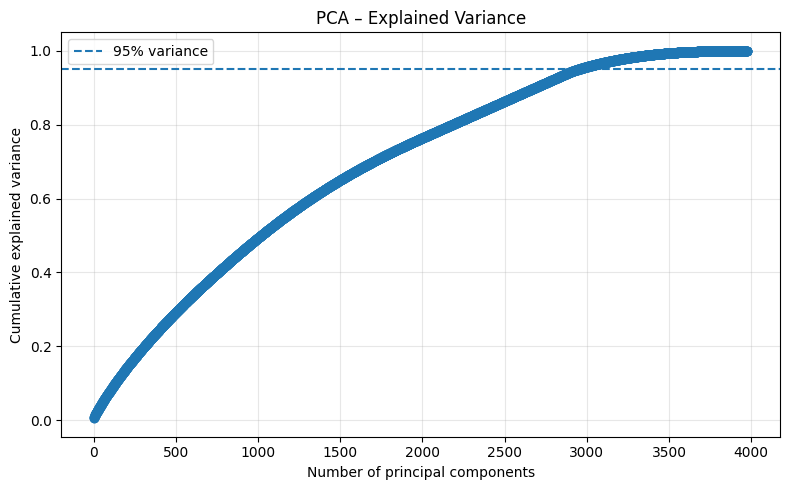

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker='o')
plt.axhline(y=0.95, linestyle='--', label='95% variance')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA – Explained Variance')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
# Example: keep 95% of variance automatically
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original features:", X.shape[1])
print("PCA components:", X_pca.shape[1])


Original features: 5044
PCA components: 2951


In [ ]:
print(f"{X.shape=}")


X.shape=(3977, 5044)


In [1]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)


NameError: name 'X_pca' is not defined

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(7, 6))
sc = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=y,
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(sc, label='Market Value (€)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA – 2D projection')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95)),
    ("model", XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
